In [2]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [58]:
import pandas as pd
import numpy as np

In [59]:
data=pd.read_csv('iris.csv')
np.random.randint(low=0,high=data.shape[0]-1,size=1)

array([0])

In [60]:
n=np.random.randint(low=0,high=data.shape[0]-1,size=10)

In [61]:
#10 Random Rows
data.loc[n][:]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
23,24,5.1,3.3,1.7,0.5,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [62]:
#Replace missing values with median
data.fillna(data.median(),inplace=True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [63]:
from sklearn import preprocessing

In [64]:
#Separate Non numeric data types
data_non_num=data.select_dtypes(include='object')

In [65]:
le=preprocessing.LabelEncoder()

In [100]:
data[data_non_num.columns]=(data_non_num).apply(le.fit_transform)

In [67]:
data['Species'].value_counts()

2    52
1    50
0    50
Name: Species, dtype: int64

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [68]:
#Drop ID column
data.drop('Id',axis=1,inplace=True)

In [78]:
corr=data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


In [86]:
less_corr=[]
for col in corr.columns:
    if (corr.loc['Species'][col]<0.1 and corr.loc[col]['Species']>-0.1):
        less_corr.append(col)

In [87]:
less_corr

[]

In [88]:
data.drop(less_corr,inplace=True)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [91]:
X=data.drop('Species',axis=1)

In [92]:
Y=data['Species']

In [97]:
X.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
dtype: float64

In [95]:
for ind in X:
    if X[ind].var()<0.1:
        X.drop(ind,axis=1,inplace=True)

In [98]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000089666BD940>,
      dtype=object)

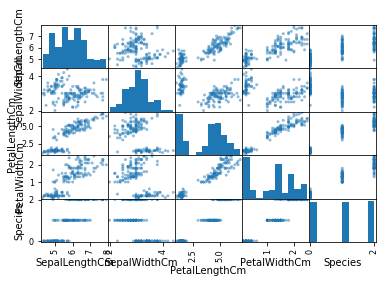

In [103]:
pd.scatter_matrix(data)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn3 = KNeighborsClassifier(n_neighbors=3  , weights = 'uniform', metric='euclidean')
knn3.fit(X_train,Y_train)
knn3_predict=knn3.predict(X_test)
print("Accuracy score for k=3 on test data is ",knn3.score(X_test,Y_test))

Accuracy score for k=3 on test data is  0.9354838709677419


In [125]:
knn5 = KNeighborsClassifier(n_neighbors=5  , weights = 'uniform', metric='euclidean')
knn5.fit(X_train,Y_train)
knn5_predict=knn5.predict(X_test)
print("Accuracy score for k=5 on test data is ",knn5.score(X_test,Y_test))

Accuracy score for k=5 on test data is  0.967741935483871


In [126]:
knn9 = KNeighborsClassifier(n_neighbors=9  , weights = 'uniform', metric='euclidean')
knn9.fit(X_train,Y_train)
knn9_predict=knn9.predict(X_test)
print("Accuracy score for k=9 on test data is ",knn9.score(X_test,Y_test))

Accuracy score for k=9 on test data is  0.967741935483871


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [128]:
from sklearn import model_selection

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [141]:
# evaluate each model in turn
results = []
k_values=[1,3,5,7,9,11,13,15,17,19]
MSE=[]
scoring = 'accuracy'
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i  , weights = 'uniform', metric='euclidean')
    knn.fit(X_train,Y_train)
    knn_predict=knn5.predict(X_test)
    kfold = model_selection.KFold(n_splits=3,random_state=2)
    cv_results = model_selection.cross_val_score(knn, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    MSE.append(1-cv_results.mean())
    msg = "For k=%d MSE score is %f" % (i,1- cv_results.mean())
    print(msg)

For k=1 MSE score is 0.774510
For k=3 MSE score is 0.953725
For k=5 MSE score is 0.980392
For k=7 MSE score is 0.980392
For k=9 MSE score is 0.980392
For k=11 MSE score is 0.980392
For k=13 MSE score is 0.980392
For k=15 MSE score is 0.980392
For k=17 MSE score is 0.980392
For k=19 MSE score is 0.980392


In [140]:
print("Model with lowest MSE",min(MSE))

Model with lowest MSE 0.7745098039215687


<b> For k=1, MSE value is lowest

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt

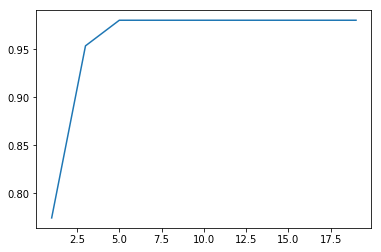

In [144]:
plt.plot(k_values,MSE)